<a href="https://colab.research.google.com/github/hb21082/CE-888-project-3/blob/main/uk_police_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as panda
import numpy as npy
import matplotlib.pyplot as plot 

#Dataset Reading CSV File Using Panda

data = panda.read_csv('number--of-arrests.csv')

data = data.head(100000) #if you want to execute entire dataset reomve this line, It excute only 100000 instances of data set
data

,Ethnicity,Gender,Arrests
0,0.0,1.0,10.0
1,0.0,1.0,25.0
2,0.0,1.0,9.0
3,0.0,1.0,0.0
4,0.0,1.0,4.0
...,...,...,...
99995,2.0,0.0,0.0
99996,2.0,0.0,0.0
99997,2.0,0.0,0.0
99998,2.0,0.0,0.0


In [ ]:
# Feature Normalization
data = (data - data.mean())/data.std()

data.head()


,Ethnicity,Gender,Arrests
0,-1.612764,0.289898,-0.069659
1,-1.612764,0.289898,-0.068773
2,-1.612764,0.289898,-0.069718
3,-1.612764,0.289898,-0.070250
4,-1.612764,0.289898,-0.070014


In [ ]:
#Adding x0 feature - assigning Value 1
data.insert(0, 'X0', 1)
data.head()

,X0,Ethnicity,Gender,Arrests
0,1,-1.612764,0.289898,-0.069659
1,1,-1.612764,0.289898,-0.068773
2,1,-1.612764,0.289898,-0.069718
3,1,-1.612764,0.289898,-0.070250
4,1,-1.612764,0.289898,-0.070014


In [ ]:
#Separting Features and Output
numberOfColumns = data.shape[1]

xFeatures = data.iloc[:, 0 : numberOfColumns - 1]
yOutput  = data.iloc[:, numberOfColumns - 1 : numberOfColumns]

In [ ]:
#Splitting Dataset into Test and Training Data
from sklearn.model_selection import train_test_split

TrAllFeaturesX, TstAllX, TrOutputVarY, TstVarY = train_test_split(xFeatures, yOutput, test_size = 0.3, random_state = 0)

In [ ]:
#Declaring and Initializing theta(0, 1, 2)
thetas = [0, 0, 0,]

In [ ]:
#Function for finding Hypothesis h(x) = theta0 + theta1x1 + theta2x2 
def findHypothesis(features, thetas):
    
    sum = npy.zeros(features.shape[0])
    for i in range(features.shape[0]):    
        for j in range(len(thetas)):
            mul = thetas[j] * features.values[i, j]
            sum[i] += mul
    return sum

In [ ]:
#Cost Function for Multiple Linear Regression
def costFunction(features, output, thetas):
    hypothesis = findHypothesis(features, thetas)
    total = 0
    for i in range(features.shape[0]):
        hypX = npy.power(hypothesis[i] - output.values[i], 2)
        total += hypX
        
    return total / (2 * features.shape[0])

In [ ]:
#Function Used to Claculate J(0)'s simple part
def gDSummation(features, output, thetas):
    hypothesis = findHypothesis(features, thetas)
    
    result = npy.zeros(TrAllFeaturesX.shape[0])
    for i in range(features.shape[0]):
        result[i] =  hypothesis[i] - output.values[i] 
        
    return result

In [ ]:
#Gradient Descent for Multiple Linear Regression Method
def gradientDescent(features, output, thetas, alpha):
    temp = thetas
    cost = npy.zeros(200000)
    totalIterations = 0
    i = 0 
    while True:
        error = gDSummation(features, output, thetas)

        for j in range(len(thetas)):
            tRight  = npy.zeros(len(error))
            for k in range(len(error)):
                tRight[k] = error[k] * features.values[k, j]
                
            temp[j] = thetas[j] - ((alpha/len(features)) * npy.sum(tRight))
            
            thetas[j] = temp[j]
                           
        cost[i] = costFunction(TrAllFeaturesX, TrOutputVarY, thetas)
    
        if i != 0:
            if abs(cost[i] - cost[i - 1]) < 0.0001:
                
                cost = cost[1: - (1500 - i - 1)]
                totalIterations = i                
                break
        i += 1
    return thetas, cost, totalIterations

In [ ]:
#Declaring and Initializing Alpha.
alpha = 0.7

In [ ]:
#Calling Gradient Descent Method.
g, cost, totalIterations = gradientDescent(TrAllFeaturesX, TrOutputVarY, thetas, alpha)
print("Final Error: ", costFunction(TrAllFeaturesX, TrOutputVarY, g))
print(f'Final Hypothesis: h(x) = {g[0]} X0 + {g[1]} X1 + {g[2]} X2')

Final Error:  [0.47327688]
Final Hypothesis: h(x) = -0.0009273604660386987 X0 + 0.056752165638893785 X1 + 0.0168039768718368 X2


In [ ]:
#Function to Calculate Hypothesis(Prediction)
def getPredictionResult(tstFeatures, finalThetas):
    prediction = 0;
    
    for i in range(len(finalThetas)):
        prediction += finalThetas[i] * tstFeatures[i]
        
    return prediction

#Function to Iterate through Test Data for Prediction
def testData():
    result = npy.zeros(TstAllX.shape[0]) 
    for i in range(TstAllX.shape[0]):
        row = TstAllX.values[i]
        result[i] = getPredictionResult(row, g)
    return result

#Call Test Data
testData()


array([ 0.01384617, -0.00305882,  0.09569681, ..., -0.05109947,
        0.04765616,  0.06456115])

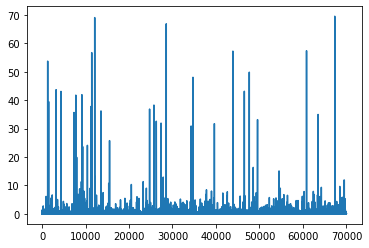

In [ ]:
 
y =TrOutputVarY.values
plot.plot(y) 
plot.show() 

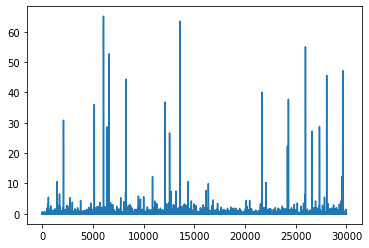

In [ ]:
#Plotting Test Output for all TestData Output(Rows)
out = TstVarY.values
plot.plot(out) 
plot.show() 
